## Matplotlib Formatting Charts

- To compare plots for different job roles within one figure, 
  Matplotlib offers the `subplot` functionality, which enables 
  arranging multiple charts in a grid layout inside a single figure.


In [3]:
# import libraries - this time added ast lib, to cleanup the skills where it was previously as a str and not a list
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanup data
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) 
    if pd.notna(skill_list) 
    else skill_list)

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

`fig` is the entire plot and  `ax` is the individual plot 

<Axes: xlabel='job_title_short'>

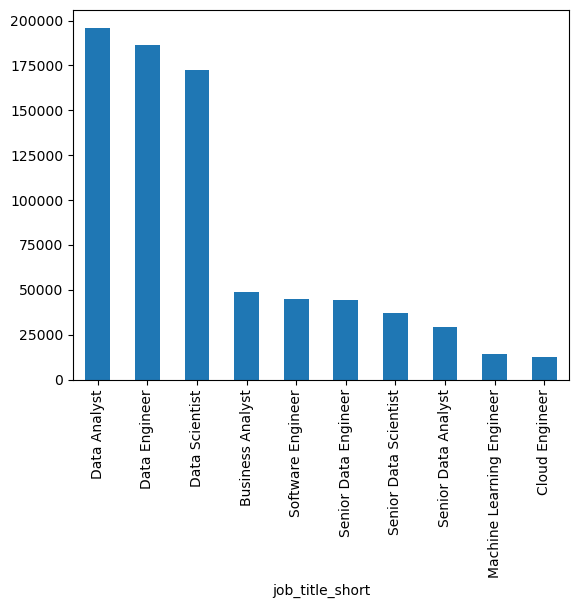

In [ ]:
fig , ax = plt.subplots()

# plot the counts of job_title_short col

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [ ]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [ ]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

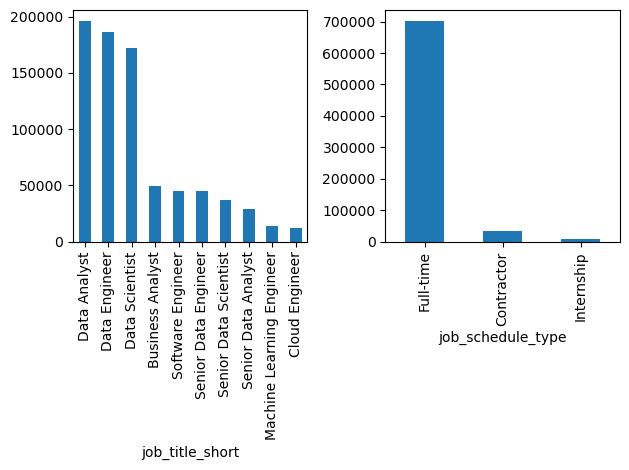

In [ ]:
fig,ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

## Example - Count of Top Skills in Job Postings

In [4]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [5]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [6]:
job_titles = ["Data Analyst", 'Data Scientist', 'Data Engineer']

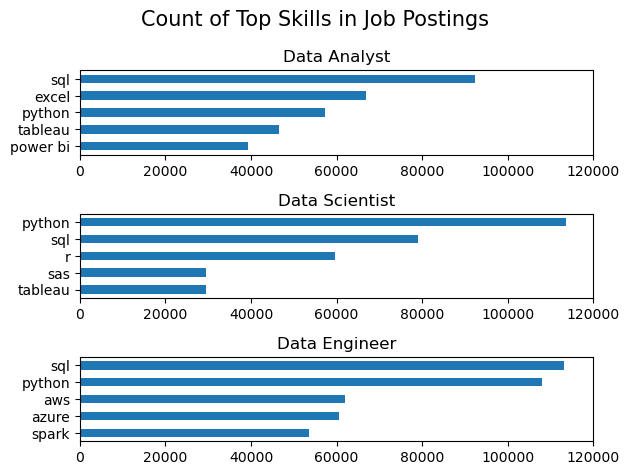

In [40]:
fig,ax = plt.subplots(3,1)

for index,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x= 'job_skills', y='skill_count', ax=ax[index], title=job_title)
    ax[index].set_ylabel('')
    ax[index].legend().set_visible(False)
    ax[index].invert_yaxis()
    ax[index].set_xlim(0,120000)


    
fig.suptitle("Count of Top Skills in Job Postings", fontsize = 15) # title of the plot
fig.tight_layout() # space out the plots
